In [1]:
# Reference
# https://velog.io/@minjoo999/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8-%EC%A0%95%EB%A6%AC-%EB%AA%A9%EC%86%8C%EB%A6%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-%EC%84%B1%EB%B3%84-%ED%8C%90%EC%A0%95%ED%95%98%EA%B8%B0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
# data_loader
df = pd.read_csv('./dataset/voice.csv')
# df.info()
# IQR(분위수의 범위): 상위 75% 지점의 값과 하위 25% 지점의 값에 대한 차이입니다.
# Q25(1분위값): 하위 25%에 대한 값입니다.

# label 값을 0, 1 boolean으로 바꿔줍니다.
df.replace(to_replace="male", value=1, inplace=True)
df.replace(to_replace="female", value=0, inplace=True)

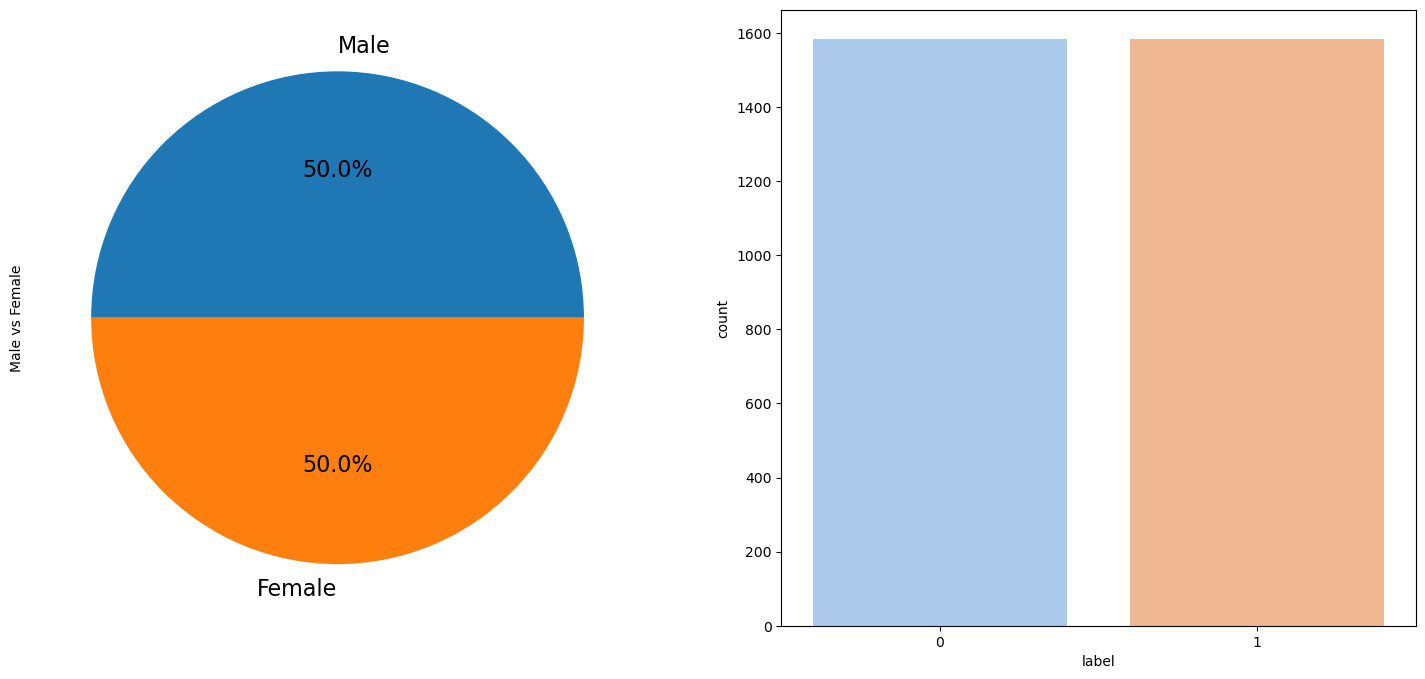

In [4]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.label.value_counts().plot(kind="pie", 
                             fontsize=16, 
                             labels=["Male", "Female"], 
                             ylabel="Male vs Female", 
                             autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="label",data=df, palette="pastel")
plt.show()

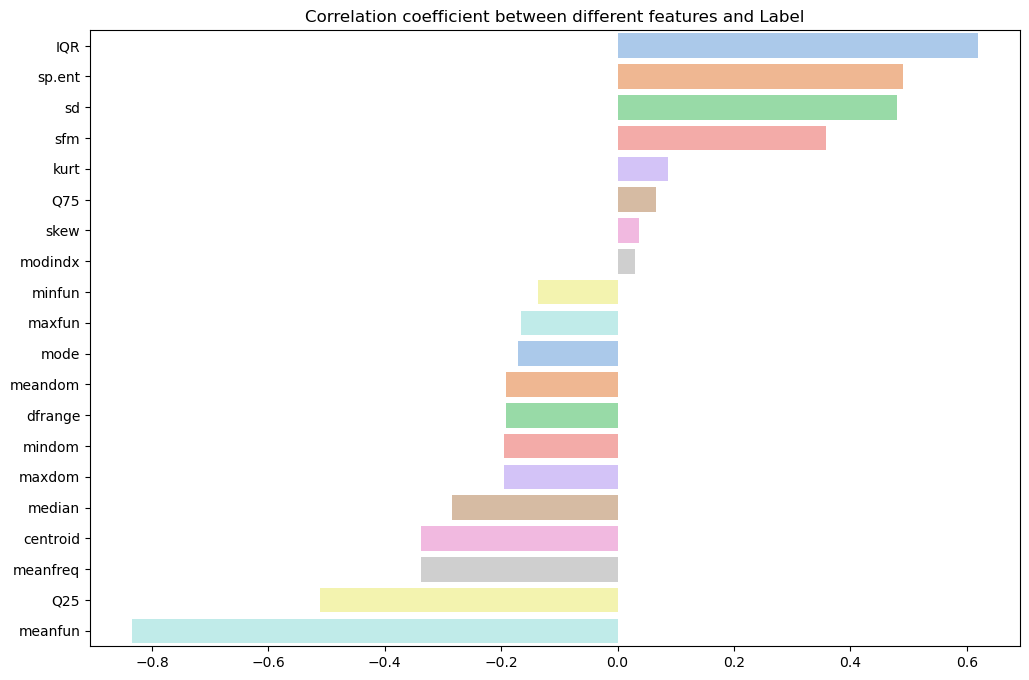

In [5]:
plt.figure(figsize=(12,8))
data = df.corr()["label"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='pastel')
plt.title('Correlation coefficient between different features and Label')
plt.show()

In [6]:
# model
# feature 3개를 분리하고 train_test_split 과정을 거쳐 train과 test로 나눕니다.
features = df.loc[:,['Q25', 'meanfun', 'IQR']]
target = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=121)
# X_train.shape, y_train.shape

regressionModel = LogisticRegression()  
regressionModel.fit(X_train,y_train)
regressionModel.score(X_train,y_train)

KNNModel = KNeighborsClassifier(n_neighbors=3) 
KNNModel.fit(X_train,y_train)
KNNModel.score(X_train,y_train)

svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10) 
svmRbfModel.fit(X_train,y_train)
svmRbfModel.score(X_train,y_train)

svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
#다항식을 이용할 경우 poly
svmPolyModel.fit(X_train,y_train)
svmPolyModel.score(X_train,y_train)

randomFModel = RandomForestClassifier(max_depth=3,min_samples_split=2) 
randomFModel.fit(X_train, y_train)
randomFModel.score(X_train,y_train)

dTreeModel = DecisionTreeClassifier(max_depth=3,min_samples_split=2) 
randomFModel.fit(X_train, y_train)
dTreeModel.fit(X_train, y_train)
dTreeModel.score(X_train,y_train)

trainScores = [regressionModel.score(X_train, y_train), KNNModel.score(X_train, y_train),svmRbfModel.score(X_train, y_train),svmPolyModel.score(X_train, y_train), randomFModel.score(X_train,y_train), dTreeModel.score(X_train,y_train)]
testScores = [regressionModel.score(X_test, y_test), KNNModel.score(X_test, y_test), svmRbfModel.score(X_test, y_test),svmPolyModel.score(X_test, y_test), randomFModel.score(X_test,y_test), dTreeModel.score(X_test,y_test)]
indices = ['Logistic Regression', 'KNN', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices) #모델별로 train 정확도와 test정확도의 결과값들을 비교해봤습니다.

In [7]:
scores

,Training Score,Testing Score
Logistic Regression,0.919890,0.899054
KNN,0.985004,0.955836
SVM-RBF,0.979874,0.962145
SVM-Poly,0.973165,0.954259
RandomForest,0.974349,0.957413
DecisionTree,0.974349,0.955836


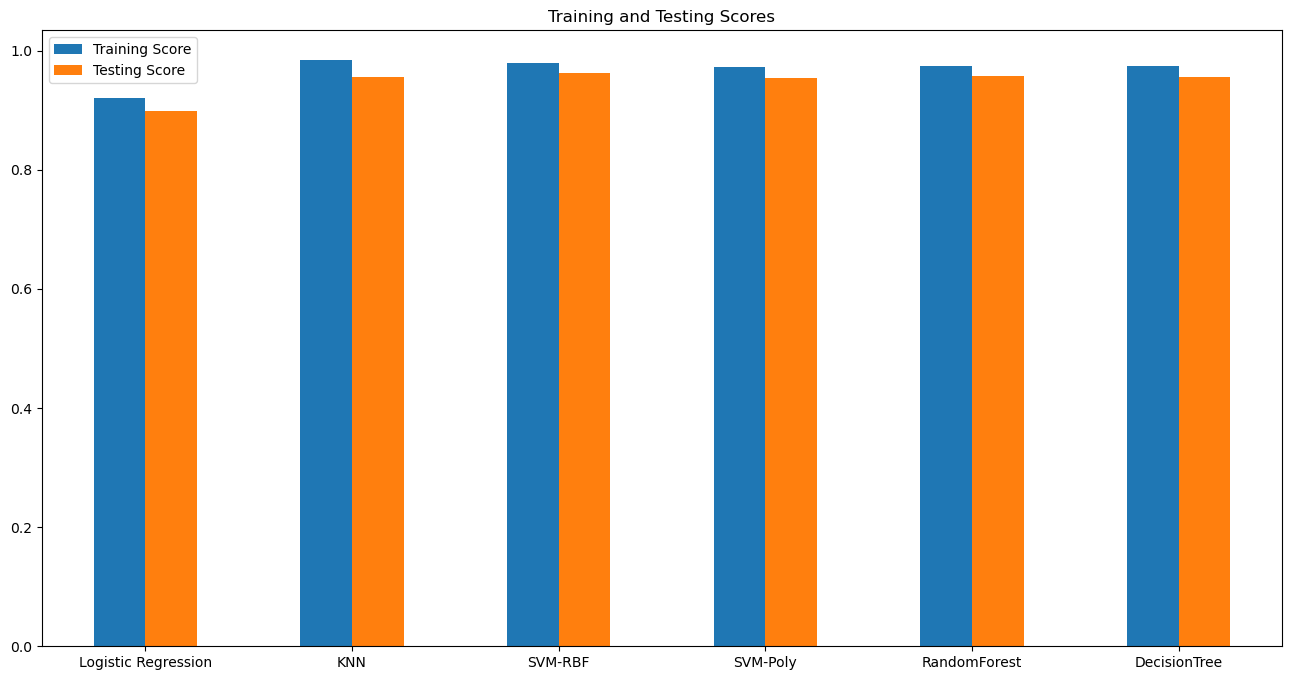

In [8]:
plot = scores.plot.bar(figsize=(16, 8), rot=0)
plt.title('Training and Testing Scores')
plt.show()

In [9]:
# 실제 목소리 데이터로 테스트
# "~analysis in R using the seewave and tuneR packages"라고 Kaggle 데이터셋에 적혀 있어 seewave & tuneR 사용해서 목소리를 데이터로
# 수정 후 테스트 해볼 수 있을거 같습니다.

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(256, input_shape=(20,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# sigmoid와 binary crossentropy를 이용한 이유는 male/female 2개의 바이너리이기 때문에

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(lr=0.001))



features = df.iloc[:, :-1] # 모든 feature 변수 넣기
target = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=121)
X_train.shape, y_train.shape

model.fit(X_train, y_train, epochs=100,
          batch_size=64, validation_split=0.25,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
          
# evaluating the model using the testing set
print(f"Evaluating the model using {len(X_test)} samples...")
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Metal device set to: Apple M1 Pro
Epoch 1/100


2023-04-28 01:45:14.360433: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
# plt.subplots(4,5,figsize=(25,20))
# for k in range(1,21):
    # plt.subplot(4,5,k)
    # plt.title(voice_df.columns[k-1])
    # sns.kdeplot(voice_df.loc[voice_df['label'] == 0, voice_df.columns[k-1]], color= 'green', label='F')
    # sns.kdeplot(voice_df.loc[voice_df['label'] == 1, voice_df.columns[k-1]], color= 'red', label='M')

# No such keys(s): 'mode.use_inf_as_null'
# 2번째 sns.kdeplot을 주석 처리하고 실행한 결과 위에 에러는 발생하지 않았지만 green color선이 보이지 않는 문제가 발생했습니다.